In [87]:
import os
import pandas as pd
import librosa
import soundfile as sf
from audiomentations import Compose, AddGaussianNoise, PitchShift, Gain, Shift, BandPassFilter, ClippingDistortion, TimeMask

# 📁 Папки
SOURCE_DIR = 'D:/pypy/kontur/data/morse_dataset/morse_dataset'
DEST_DIR = 'morse_data/audio'
os.makedirs(DEST_DIR, exist_ok=True)

# 📄 Исходный датасет
df = pd.read_csv('D:/pypy/kontur/data/train.csv')

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=9, p=0.9),
    Gain(min_gain_db=-6.0, max_gain_db=6.0, p=0.7),
    Shift(min_shift=-0.08, max_shift=0.08, p=0.5),
    BandPassFilter(min_center_freq=300, max_center_freq=3000, min_bandwidth_fraction=0.5, max_bandwidth_fraction=1.0, p=0.2),
    ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=20, p=0.4),
    # TimeMask(min_band_part=0.001, max_band_part=0.005, p=0.3)  
])
#  Список новых записей
augmented_records = []

# 🔁 Цикл по строкам train.csv
for idx, row in df.iterrows():
    file_id = row["id"]
    label = row["message"]
    orig_path = os.path.join(SOURCE_DIR, f"{file_id}")

    try:
        samples, sr = librosa.load(orig_path, sr=None)
    except Exception as e:
        print(f"❌ Error loading {orig_path}: {e}")
        continue

    # Аугментация
    augmented_samples = augment(samples=samples, sample_rate=sr)

    # Генерация нового ID (без расширения)
    new_file_id = f"{file_id}"
    new_filename = f"{new_file_id}"
    new_file_path = os.path.join(DEST_DIR, new_filename)

    try:
        sf.write(new_file_path, augmented_samples, sr, format='OGG', subtype='OPUS')
    except Exception as e:
        print(f"❌ Error saving {new_file_path}: {e}")
        continue

    # Добавление строки в metadata
    augmented_records.append({
        "id": new_file_id,  # ❗️без .opus
        "message": label
    })

    if idx % 100 == 0:
        print(f"✅ Processed {idx}/{len(df)}")
        # break

# 💾 Сохраняем метаданные
aug_df = pd.DataFrame(augmented_records)
aug_df.to_csv('morse_data/metadata.csv', index=False)
print("🎉 Аугментированные данные сохранены.")


✅ Processed 0/30000
✅ Processed 100/30000
✅ Processed 200/30000
✅ Processed 300/30000
✅ Processed 400/30000
✅ Processed 500/30000
✅ Processed 600/30000
✅ Processed 700/30000
✅ Processed 800/30000
✅ Processed 900/30000
✅ Processed 1000/30000
✅ Processed 1100/30000
✅ Processed 1200/30000
✅ Processed 1300/30000
✅ Processed 1400/30000
✅ Processed 1500/30000
✅ Processed 1600/30000
✅ Processed 1700/30000
✅ Processed 1800/30000
✅ Processed 1900/30000
✅ Processed 2000/30000
✅ Processed 2100/30000
✅ Processed 2200/30000
✅ Processed 2300/30000
✅ Processed 2400/30000
✅ Processed 2500/30000
✅ Processed 2600/30000
✅ Processed 2700/30000
✅ Processed 2800/30000
✅ Processed 2900/30000
✅ Processed 3000/30000
✅ Processed 3100/30000
✅ Processed 3200/30000
✅ Processed 3300/30000
✅ Processed 3400/30000
✅ Processed 3500/30000
✅ Processed 3600/30000
✅ Processed 3700/30000
✅ Processed 3800/30000
✅ Processed 3900/30000
✅ Processed 4000/30000
✅ Processed 4100/30000
✅ Processed 4200/30000
✅ Processed 4300/30000


In [12]:
import librosa

def open_file(path):
    file_path = path

    # Загружаем звук, приводим к 32kHz
    y, sr = librosa.load(file_path, sr=32000)

    file_name = path.split('/')[-1]
    # Проверим длительность
    # print(f"Имя файла: {file_name}")
    # print(f"Длительность: {len(y) / sr:.2f} сек, Частота: {sr} Гц")
    return y, sr


In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Построим мел-спектрограмму
def get_mell(y_denoised, sr):
    S = librosa.feature.melspectrogram(y=y_denoised, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB


def draw_mell(S_dB, sr):
    # Отрисовка
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram (denoised)')
    plt.tight_layout()
    plt.show()

In [59]:
def path_to_files_from_n_to_m(n, m):
    base_path = "morse_data/audio/"
    path_to_orig = "D:/pypy/kontur/data/morse_dataset/morse_dataset/"
    for i in range(n, m):
        yield (base_path + str(i) + ".opus", path_to_orig + str(i) + ".opus")

morse_data/audio/1.opus


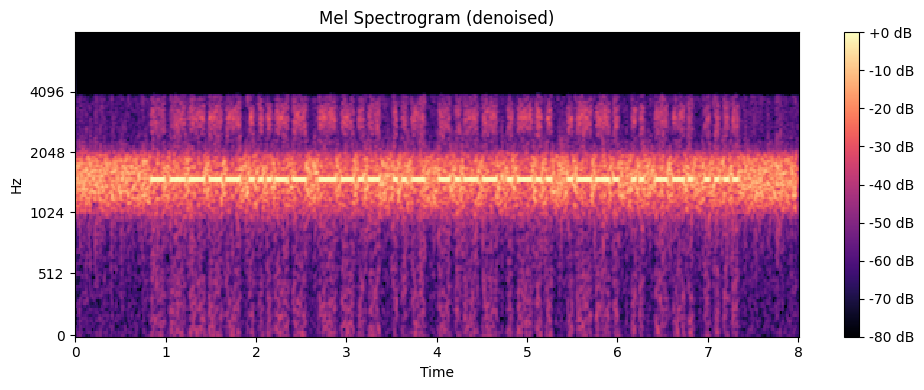

D:/pypy/kontur/data/morse_dataset/morse_dataset/1.opus


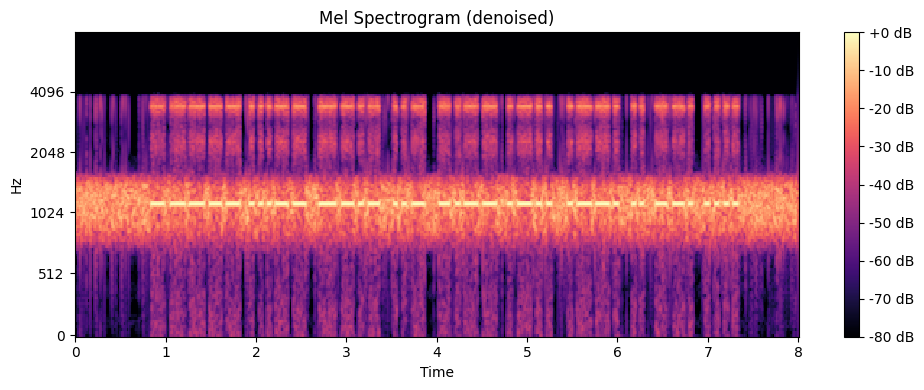

morse_data/audio/2.opus


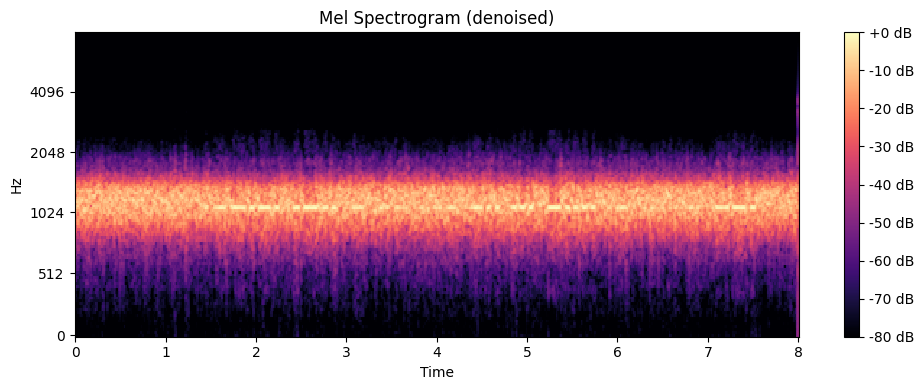

D:/pypy/kontur/data/morse_dataset/morse_dataset/2.opus


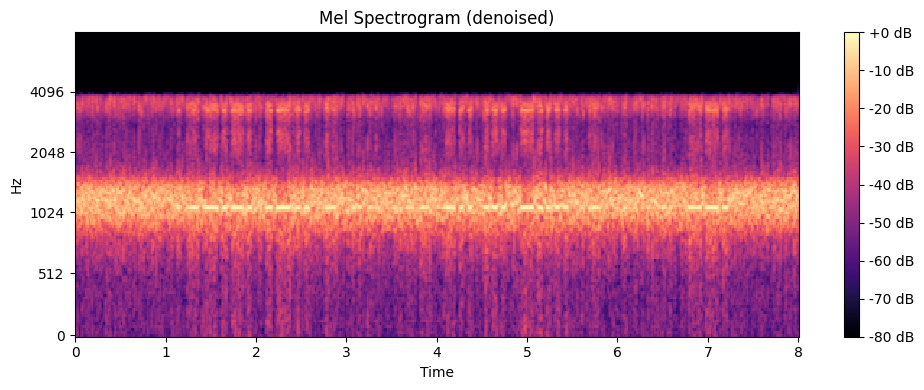

morse_data/audio/3.opus


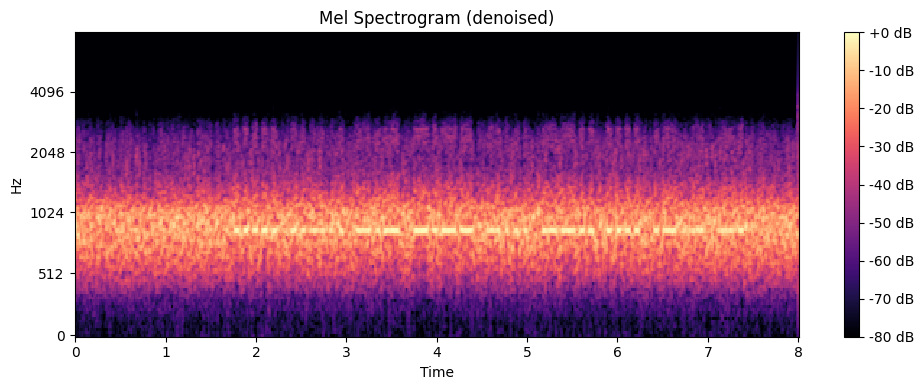

D:/pypy/kontur/data/morse_dataset/morse_dataset/3.opus


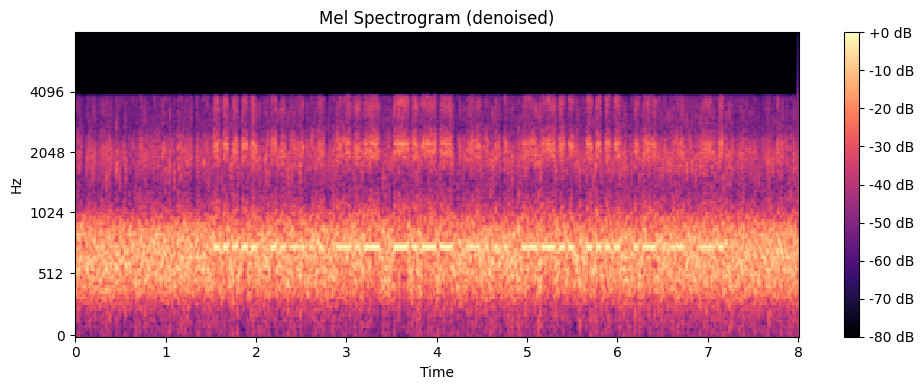

morse_data/audio/4.opus


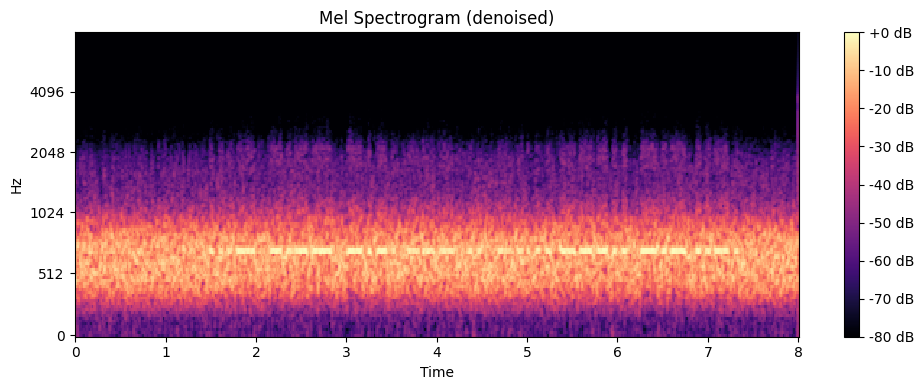

D:/pypy/kontur/data/morse_dataset/morse_dataset/4.opus


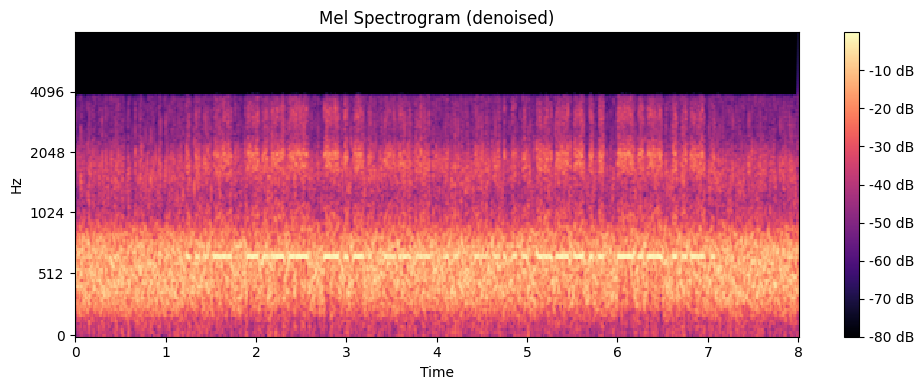

In [85]:
for i, j in path_to_files_from_n_to_m(1, 5):
    print(i)
    y, sr = open_file(i)
    S_db = get_mell(y, sr)
    draw_mell(S_db, sr)
    print(j)
    y, sr = open_file(j)
    S_db = get_mell(y, sr)
    draw_mell(S_db, sr)
    